<a href="https://colab.research.google.com/github/beyzoskaya/machineLearning_CS454/blob/main/homeworks/convolutionalAutoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [751]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import random_split


In [752]:
from torchvision.datasets import FashionMNIST

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data, resize_transform=None, target_transform=None):
        self.data = data
        self.resize_transform = resize_transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx]

        if self.target_transform:
            original_image = self.target_transform(image)

        if self.resize_transform:
            resized_image = self.resize_transform(image)

        return resized_image, original_image,label


In [753]:
resize_transform = transforms.Compose([
    transforms.Resize((7,7)),
    transforms.ToTensor(),
])

target_transform_train = transforms.Compose([
  transforms.ToTensor(),
])

target_transform_test = transforms.Compose([
    transforms.ToTensor(),
])


In [754]:
train_dataset_original = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True)
test_dataset_original  = torchvision.datasets.FashionMNIST(root='data', train=False, download=True)


In [755]:
train_dataset = CustomDataset(train_dataset_original,resize_transform=resize_transform, target_transform=target_transform_train)
test_dataset = CustomDataset(test_dataset_original, resize_transform=resize_transform, target_transform=target_transform_test)


In [756]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [757]:
train_size = int(0.8 * len(train_dataset))
validation_size = len(train_dataset) - train_size
train_dataset, validation_dataset = random_split(train_dataset, [train_size, validation_size])


In [758]:
len(validation_dataset)

12000

In [759]:
BATCH_SIZE = 64
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=BATCH_SIZE, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


Resized Images:


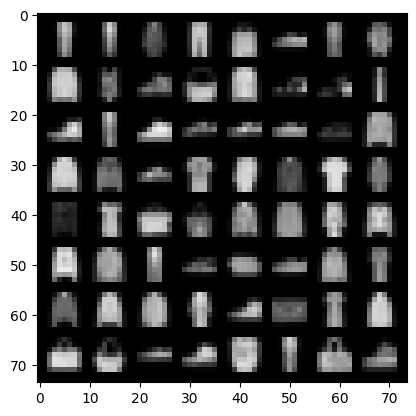

Original Images:


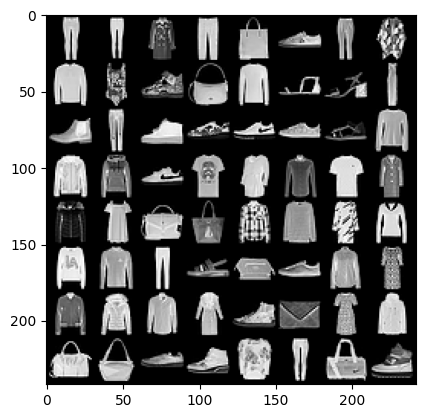

In [760]:
import matplotlib.pyplot as plt

def imshow(img):
    # if using normalization in transforms, you may need to normalize
    # img = img / 2 + 0.5  # unnormalize if you used normalization in your transforms
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
resized_images, original_images, labels = next(dataiter)

# Show images
print("Resized Images:")
imshow(torchvision.utils.make_grid(resized_images))
print("Original Images:")
imshow(torchvision.utils.make_grid(original_images))


Resized Images:


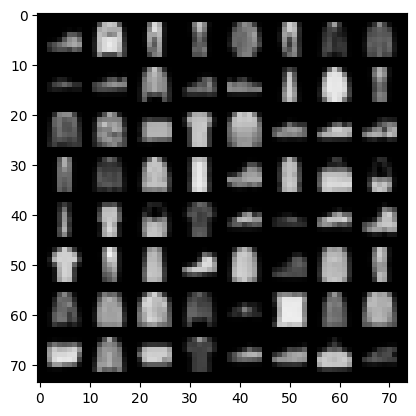

Original Images:


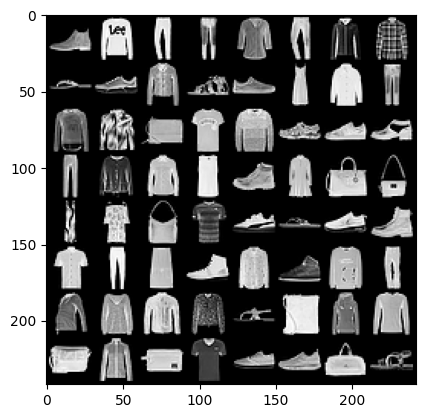

In [761]:
def imshow_test(img):
    # if using normalization in transforms, you may need to normalize
    # img = img / 2 + 0.5  # unnormalize if you used normalization in your transforms
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(test_loader)
resized_images, original_images, labels = next(dataiter)

# Show images
print("Resized Images:")
imshow_test(torchvision.utils.make_grid(resized_images))
print("Original Images:")
imshow_test(torchvision.utils.make_grid(original_images))


Resized Images:


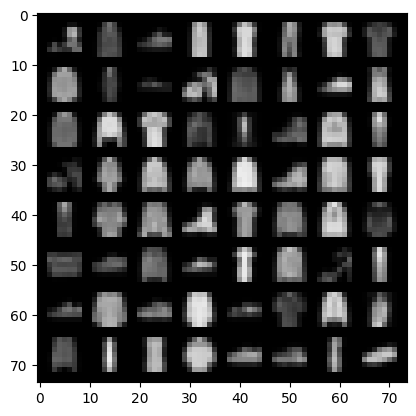

Original Images:


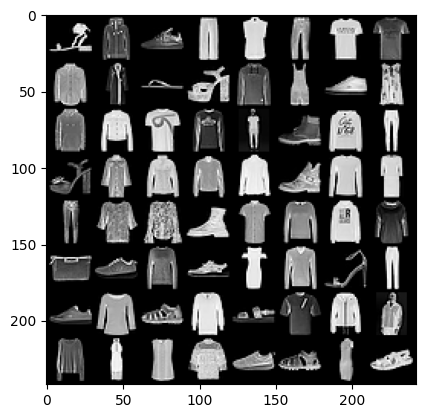

In [762]:
def imshow_val(img):
    # if using normalization in transforms, you may need to normalize
    # img = img / 2 + 0.5  # unnormalize if you used normalization in your transforms
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(validation_loader)
resized_images, original_images, labels = next(dataiter)

# Show images
print("Resized Images:")
imshow_val(torchvision.utils.make_grid(resized_images))
print("Original Images:")
imshow_val(torchvision.utils.make_grid(original_images))


In [763]:
len(train_loader), len(validation_loader), len(test_loader)

(750, 188, 157)

In [764]:
for batch in train_loader:
    resized_images, original_images, labels = batch

    # Print the shape of the resized images
    print("Shape of resized images:", resized_images.shape)

    # Print the shape of the original images
    print("Shape of original images:", original_images.shape)

    # Print the labels
    print("Labels:", labels)

    # Break the loop after the first batch
    break


Shape of resized images: torch.Size([64, 1, 7, 7])
Shape of original images: torch.Size([64, 1, 28, 28])
Labels: tensor([9, 5, 5, 3, 9, 9, 6, 9, 3, 5, 4, 5, 4, 9, 3, 4, 9, 9, 4, 2, 3, 2, 9, 3,
        7, 2, 8, 4, 6, 7, 4, 6, 8, 7, 4, 9, 4, 4, 9, 0, 4, 5, 0, 4, 9, 3, 7, 6,
        5, 2, 9, 1, 7, 9, 9, 3, 5, 8, 2, 7, 6, 8, 3, 3])


In [765]:
label_classes = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

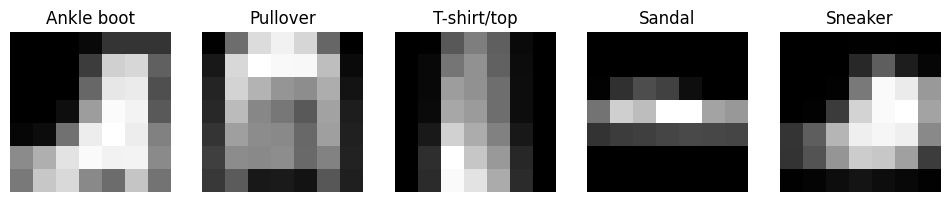

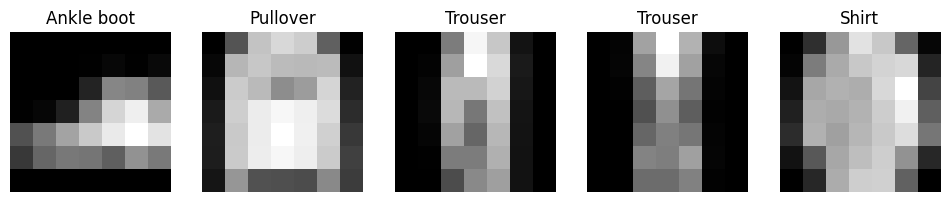

In [766]:
import matplotlib.pyplot as plt

def show_images(dataloader, num_images=5):

    for resized_images, original_images, labels in dataloader:
        resized_images = resized_images[:num_images]
        labels = labels[:num_images]

        plt.figure(figsize=(12, 6))

        for i, (image, label) in enumerate(zip(resized_images, labels)):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(image.permute(1, 2, 0).numpy().squeeze(), cmap='gray')
            plt.title(f"{label_classes[label.item()]}")
            plt.axis('off')

        plt.show()
        break

show_images(train_loader)
show_images(test_loader)

In [767]:
class Encoder(nn.Module):
    def __init__(self, encoded_space_dim):
        super().__init__()
        self.encoder_cnn = nn.Sequential(
            nn.Conv2d(1, 8, 3, stride=1, padding=1),  # 7x7 -> 7x7
            nn.ReLU(True),
            nn.Conv2d(8, 16, 3, stride=1, padding=0),  # 7x7 -> 5x5
            nn.ReLU(True),
        )
        self.flatten = nn.Flatten(start_dim=1)
        # Adjust the number of input features to match the output of the last conv layer
        self.encoder_lin = nn.Sequential(
            nn.Linear(16 * 5 * 5, encoded_space_dim),  # 16 --> last conv layer, 5--> 5x5 last conv dimension
            nn.ReLU(True)
        )

    def forward(self, x):
        #print(f"Shape initially inside encoder: {x.shape}")
        x = self.encoder_cnn(x)
        #print(f"Shape after encoder cnn: {x.shape}")
        x = self.flatten(x)
        #print(f"Shape after flatten: {x.shape}")
        x = self.encoder_lin(x)
        #print(f"Shape after encoder linear: {x.shape}")
        return x


In [768]:
class Decoder(nn.Module):
    def __init__(self, encoded_space_dim):
        super().__init__()
        self.decoder_lin = nn.Linear(encoded_space_dim, 16 * 5 * 5)
        self.unflatten = nn.Unflatten(1, (16, 5, 5))

        # [5x5] to [7x7]
        self.upconv1 =nn.Sequential(
          nn.ConvTranspose2d(16,16, kernel_size=3, stride=1, padding=0),
          nn.ReLU(True)
        )
        self.upconv2 = nn.Sequential(
          nn.ConvTranspose2d(16,8,kernel_size=3, stride=1, padding=1),
          nn.ReLU(True)
        )
        self.upconv3 = nn.Sequential(
          nn.ConvTranspose2d(8, 4, kernel_size=4, stride=2, padding=1),
          nn.ReLU(True)
        )
        self.final_conv = nn.Sequential(
          nn.ConvTranspose2d(4, 1, kernel_size=4, stride=2, padding=1),
          nn.ReLU(True)
        )

    def forward(self, x):
        #print(f"Shape initially inside decoder: {x.shape}")
        x = self.decoder_lin(x)
        #print(f"Shape after decoder linear: {x.shape}")
        x = self.unflatten(x)
        #print(f"Shape after unflatten: {x.shape}")

        x = self.upconv1(x)
        #print(f"Shape after first convolutional: {x.shape}")
        x = self.upconv2(x)
        #print(f"Shape after second conv: {x.shape}")
        x = self.upconv3(x)
        #print(f"Shape after third conv: {x.shape}")
        x = self.final_conv(x)
        #print(f"Shape after final conv: {x.shape}")
        #x = torch.sigmoid(x)

        #print(f"Shape after sigmoid: {x.shape}")
        return x


In [769]:
class EncoderWithOneConv(nn.Module):
    def __init__(self, encoded_space_dim):
        super().__init__()
        # self.encoder_cnn = nn.Sequential(
        #     nn.Conv2d(1, 8, 3, stride=1, padding=1),  # 7x7 -> 7x7
        #     nn.ReLU(True),
        #     nn.Conv2d(8, 16, 3, stride=1, padding=0),  # 7x7 -> 5x5
        #     nn.ReLU(True),
        #     nn.Conv2d(16, 16, 3, stride=1, padding=1),  # New Convolutional Layer
        #     nn.ReLU(True),
        # )

        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 8, 3, stride=1, padding=1),
            nn.ReLU(True)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(8, 16, 3, stride=1, padding=0),
            nn.ReLU(True),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(16, 16, 3, stride=1, padding=1),
            nn.ReLU(True),
        )

        self.flatten = nn.Flatten(start_dim=1)
        self.encoder_lin = nn.Sequential(
            nn.Linear(16 * 5 * 5, encoded_space_dim),
            nn.ReLU(True)
        )

    def forward(self, x):
        print(f"Shape initially inside decoder: {x.shape}")
        x = self.conv1(x)
        print(f"Shape after conv1: {x.shape}")
        x = self.conv2(x)
        print(f"Shape after conv2: {x.shape}")
        x = self.conv3(x)
        print(f"Shape after conv3: {x.shape}")
        x = self.flatten(x)
        print("Shape after flatten: {x.shape}")
        x = self.encoder_lin(x)
        print(f"Shape after linear: {x.shap}")
        return x


class DecoderForOneConv(nn.Module):
    def __init__(self, encoded_space_dim):
        super().__init__()
        self.decoder_lin = nn.Linear(encoded_space_dim, 16 * 5 * 5)
        self.unflatten = nn.Unflatten(1, (16, 5, 5))

        # [5x5] to [7x7]
        self.upconv1 =nn.Sequential(
          nn.ConvTranspose2d(16,16, kernel_size=3, stride=1, padding=0),
          nn.ReLU(True)
        )
        self.upconv2 = nn.Sequential(
          nn.ConvTranspose2d(16,8,kernel_size=3, stride=1, padding=1),
          nn.ReLU(True)
        )
        self.upconv3 = nn.Sequential(
          nn.ConvTranspose2d(8, 4, kernel_size=4, stride=2, padding=1),
          nn.ReLU(True)
        )
        self.final_conv = nn.Sequential(
          nn.ConvTranspose2d(4, 1, kernel_size=4, stride=2, padding=1),
          nn.ReLU(True)
        )

    def forward(self, x):
        #print(f"Shape initially inside decoder: {x.shape}")
        x = self.decoder_lin(x)
        #print(f"Shape after decoder linear: {x.shape}")
        x = self.unflatten(x)
        #print(f"Shape after unflatten: {x.shape}")

        x = self.upconv1(x)
        #print(f"Shape after first convolutional: {x.shape}")
        x = self.upconv2(x)
        #print(f"Shape after second conv: {x.shape}")
        x = self.upconv3(x)
        #print(f"Shape after third conv: {x.shape}")
        x = self.final_conv(x)
        #print(f"Shape after final conv: {x.shape}")
        #x = torch.sigmoid(x)

        #print(f"Shape after sigmoid: {x.shape}")
        return x


In [770]:
### Define the loss function
loss_fn = torch.nn.MSELoss()

### Define an optimizer (both for the encoder and the decoder!)
lr= 0.0001

### Set the random seed for reproducible results

### Initialize the two networks
d = 16

#model = Autoencoder(encoded_space_dim=encoded_space_dim)
encoder = Encoder(encoded_space_dim=d)
decoder = Decoder(encoded_space_dim=d)
params_to_optimize = [
    {'params': encoder.parameters()},
    {'params': decoder.parameters()}
]

optim = torch.optim.Adam(params_to_optimize, lr=lr)


In [771]:
# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

# Move both the encoder and the decoder to the selected device
encoder.to(device)
decoder.to(device)


Selected device: cpu


Decoder(
  (decoder_lin): Linear(in_features=16, out_features=400, bias=True)
  (unflatten): Unflatten(dim=1, unflattened_size=(16, 5, 5))
  (upconv1): Sequential(
    (0): ConvTranspose2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
  )
  (upconv2): Sequential(
    (0): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (upconv3): Sequential(
    (0): ConvTranspose2d(8, 4, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (final_conv): Sequential(
    (0): ConvTranspose2d(4, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
)

In [772]:
encoder

Encoder(
  (encoder_cnn): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (encoder_lin): Sequential(
    (0): Linear(in_features=400, out_features=16, bias=True)
    (1): ReLU(inplace=True)
  )
)

In [773]:
def train_epoch(encoder, decoder, device, dataloader, loss_fn, optimizer):
    # Set train mode for both the encoder and the decoder
    encoder.train()
    decoder.train()
    train_loss = []

    # Iterate the dataloader
    for resized_image, original_image, _ in dataloader:
        # Move tensor to the proper device
        resized_image = resized_image.to(device)
        #print(f"Shape for resized image: {resized_image.shape}")
        original_image = original_image.to(device)
        #print(f"Shape for original image: {original_image.shape}")

        # Encode data
        encoded_data = encoder(resized_image)

        # Decode data
        decoded_data = decoder(encoded_data)

        # Evaluate loss
        loss = loss_fn(decoded_data, original_image)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print batch loss
        print('\t partial train loss (single batch): %f' % (loss.data))
        train_loss.append(loss.detach().cpu().numpy())

    return np.mean(train_loss)


In [774]:
def test_epoch(encoder, decoder, device, dataloader, loss_fn):
    # Set evaluation mode for encoder and decoder
    encoder.eval()
    decoder.eval()
    with torch.no_grad():  # No need to track the gradients
        # Define the lists to store the outputs and labels for each batch
        conc_out = []
        conc_original = []

        # Iterate the dataloader
        for resized_image, original_image, _ in dataloader:
            # Move tensor to the proper device
            resized_image = resized_image.to(device)
            #print(f"Shape for resized image: {resized_image.shape}")
            original_image = original_image.to(device)
            #print(f"Shape for original image: {original_image.shape}")

            # Encode and Decode data
            encoded_data = encoder(resized_image)
            decoded_data = decoder(encoded_data)

            # Append the decoded data and the original image to the lists
            conc_out.append(decoded_data.cpu())
            conc_original.append(original_image.cpu())

        # Concatenate all the values in the lists
        conc_out = torch.cat(conc_out)
        conc_original = torch.cat(conc_original)

        # Evaluate global loss
        val_loss = loss_fn(conc_out, conc_original)

    return val_loss.item()  # Use .item() to get the scalar value of the loss tensor


In [775]:
test_dataset[0][0].shape

torch.Size([1, 7, 7])

In [776]:
train_dataset[0][0].shape

torch.Size([1, 7, 7])

In [777]:
def plot_ae_outputs(encoder, decoder, dataset, n=10):
    plt.figure(figsize=(16, 4.5))

    # Get labels from the dataset
    labels = np.array([dataset[idx][2] for idx in range(len(dataset))])

    # Select indices for plotting
    t_idx = {i: np.where(labels == i)[0][0] for i in range(n)}

    for i in range(n):
        ax = plt.subplot(2, n, i + 1)

        # Extract image and label from the dataset
        img, _, _ = dataset[t_idx[i]]
        img = img.unsqueeze(0).to(device)

        encoder.eval()
        decoder.eval()

        with torch.no_grad():
            rec_img = decoder(encoder(img))

        plt.imshow(img.cpu().squeeze().numpy(), cmap='gist_gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if i == n // 2:
            ax.set_title('Original images')

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if i == n // 2:
            ax.set_title('Reconstructed images')

    plt.show()


	 partial train loss (single batch): 0.164473
	 partial train loss (single batch): 0.133211
	 partial train loss (single batch): 0.126084
	 partial train loss (single batch): 0.151925
	 partial train loss (single batch): 0.150063
	 partial train loss (single batch): 0.163129
	 partial train loss (single batch): 0.168916
	 partial train loss (single batch): 0.165938
	 partial train loss (single batch): 0.138964
	 partial train loss (single batch): 0.155205
	 partial train loss (single batch): 0.139567
	 partial train loss (single batch): 0.147147
	 partial train loss (single batch): 0.147360
	 partial train loss (single batch): 0.144899
	 partial train loss (single batch): 0.130725
	 partial train loss (single batch): 0.152651
	 partial train loss (single batch): 0.141977
	 partial train loss (single batch): 0.136244
	 partial train loss (single batch): 0.126340
	 partial train loss (single batch): 0.139628
	 partial train loss (single batch): 0.133163
	 partial train loss (single batch

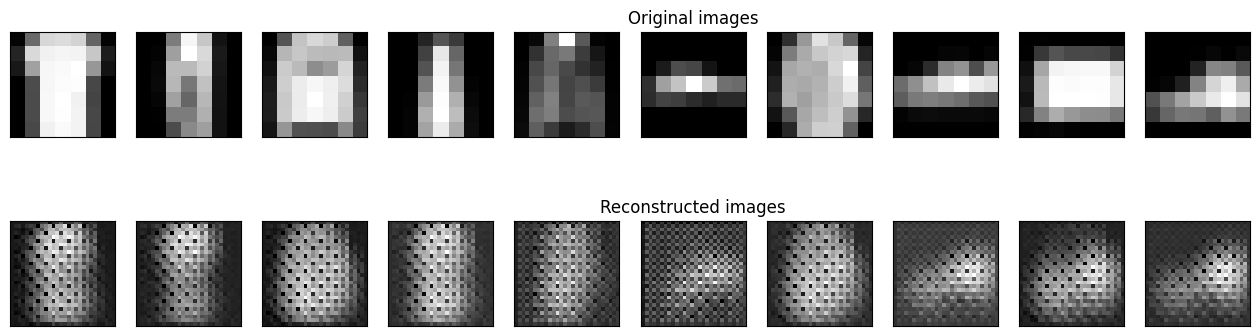

	 partial train loss (single batch): 0.067013
	 partial train loss (single batch): 0.066915
	 partial train loss (single batch): 0.069975
	 partial train loss (single batch): 0.077982
	 partial train loss (single batch): 0.071741
	 partial train loss (single batch): 0.063890
	 partial train loss (single batch): 0.064846
	 partial train loss (single batch): 0.064252
	 partial train loss (single batch): 0.068855
	 partial train loss (single batch): 0.069136
	 partial train loss (single batch): 0.059681
	 partial train loss (single batch): 0.069321
	 partial train loss (single batch): 0.067380
	 partial train loss (single batch): 0.066636
	 partial train loss (single batch): 0.068675
	 partial train loss (single batch): 0.063362
	 partial train loss (single batch): 0.068307
	 partial train loss (single batch): 0.063042
	 partial train loss (single batch): 0.069608
	 partial train loss (single batch): 0.065383
	 partial train loss (single batch): 0.063549
	 partial train loss (single batch

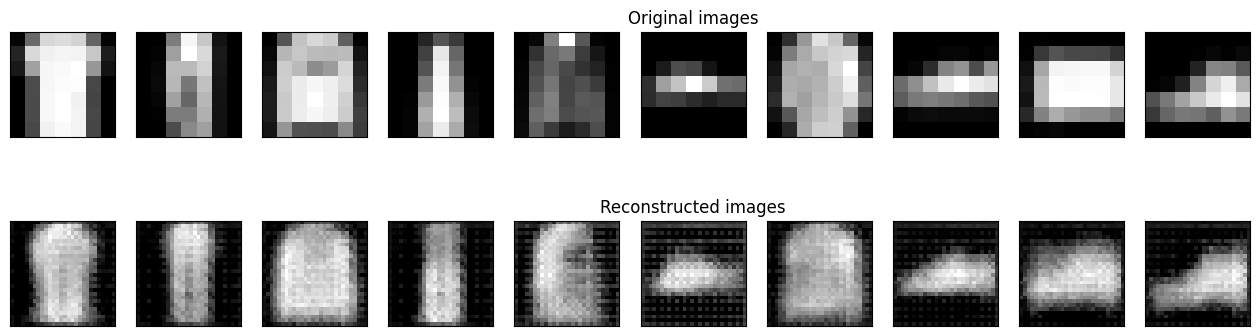

	 partial train loss (single batch): 0.034811
	 partial train loss (single batch): 0.033951
	 partial train loss (single batch): 0.032818
	 partial train loss (single batch): 0.035614
	 partial train loss (single batch): 0.035334
	 partial train loss (single batch): 0.034939
	 partial train loss (single batch): 0.035519
	 partial train loss (single batch): 0.034344
	 partial train loss (single batch): 0.034419
	 partial train loss (single batch): 0.035268
	 partial train loss (single batch): 0.033497
	 partial train loss (single batch): 0.035038
	 partial train loss (single batch): 0.033330
	 partial train loss (single batch): 0.033963
	 partial train loss (single batch): 0.033563
	 partial train loss (single batch): 0.036190
	 partial train loss (single batch): 0.035357
	 partial train loss (single batch): 0.034074
	 partial train loss (single batch): 0.034181
	 partial train loss (single batch): 0.031642
	 partial train loss (single batch): 0.034650
	 partial train loss (single batch

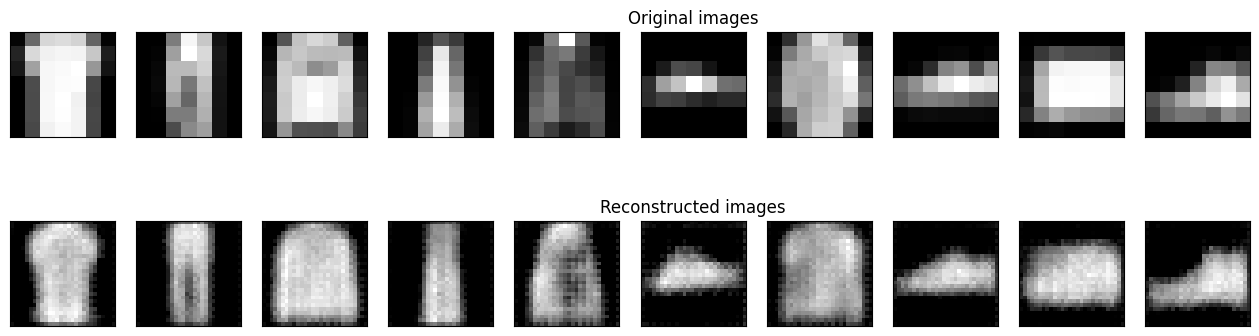

	 partial train loss (single batch): 0.026976
	 partial train loss (single batch): 0.028160
	 partial train loss (single batch): 0.027828
	 partial train loss (single batch): 0.030210
	 partial train loss (single batch): 0.028888
	 partial train loss (single batch): 0.025301
	 partial train loss (single batch): 0.027261
	 partial train loss (single batch): 0.028090
	 partial train loss (single batch): 0.028358
	 partial train loss (single batch): 0.025856
	 partial train loss (single batch): 0.028724
	 partial train loss (single batch): 0.027593
	 partial train loss (single batch): 0.027924
	 partial train loss (single batch): 0.029749
	 partial train loss (single batch): 0.028282
	 partial train loss (single batch): 0.028369
	 partial train loss (single batch): 0.025534
	 partial train loss (single batch): 0.029917
	 partial train loss (single batch): 0.028144
	 partial train loss (single batch): 0.027032
	 partial train loss (single batch): 0.032891
	 partial train loss (single batch

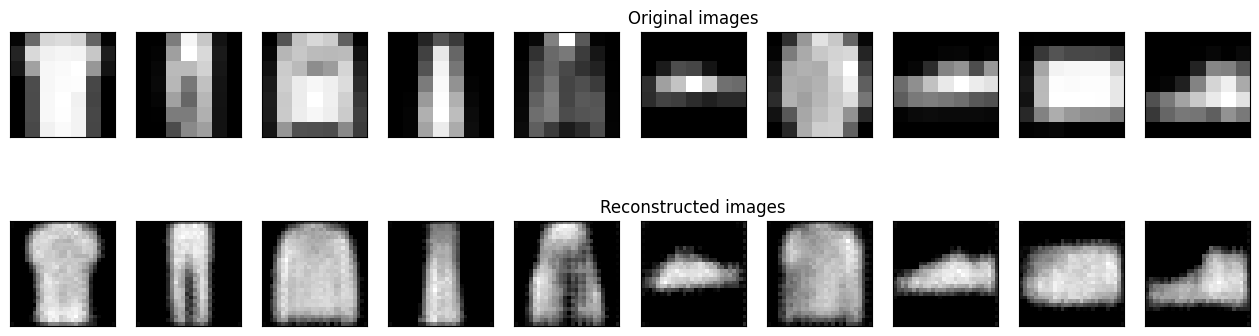

	 partial train loss (single batch): 0.032424
	 partial train loss (single batch): 0.026913
	 partial train loss (single batch): 0.025326
	 partial train loss (single batch): 0.026207
	 partial train loss (single batch): 0.024820
	 partial train loss (single batch): 0.026066
	 partial train loss (single batch): 0.025658
	 partial train loss (single batch): 0.025930
	 partial train loss (single batch): 0.026244
	 partial train loss (single batch): 0.027880
	 partial train loss (single batch): 0.022929
	 partial train loss (single batch): 0.028144
	 partial train loss (single batch): 0.029412
	 partial train loss (single batch): 0.028216
	 partial train loss (single batch): 0.024829
	 partial train loss (single batch): 0.022850
	 partial train loss (single batch): 0.022922
	 partial train loss (single batch): 0.026913
	 partial train loss (single batch): 0.022323
	 partial train loss (single batch): 0.023063
	 partial train loss (single batch): 0.025420
	 partial train loss (single batch

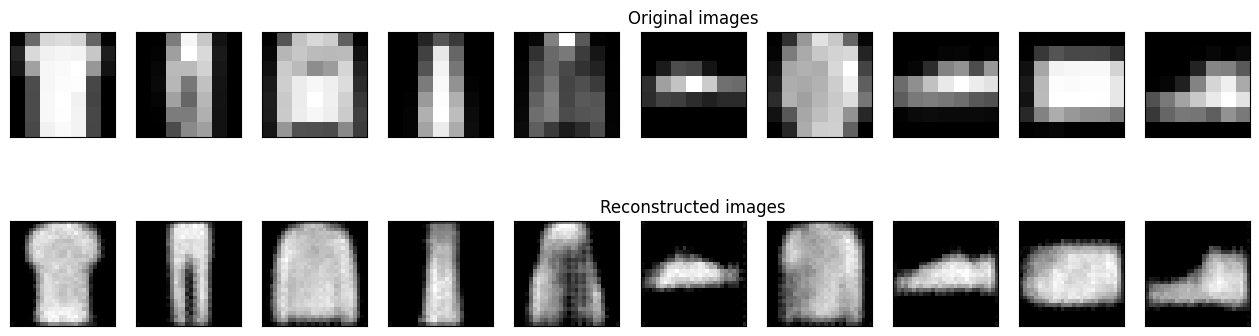

	 partial train loss (single batch): 0.024849
	 partial train loss (single batch): 0.026035
	 partial train loss (single batch): 0.022411
	 partial train loss (single batch): 0.022982
	 partial train loss (single batch): 0.024558
	 partial train loss (single batch): 0.024903
	 partial train loss (single batch): 0.024563
	 partial train loss (single batch): 0.023760
	 partial train loss (single batch): 0.025114
	 partial train loss (single batch): 0.025145
	 partial train loss (single batch): 0.023717
	 partial train loss (single batch): 0.021788
	 partial train loss (single batch): 0.024610
	 partial train loss (single batch): 0.025297
	 partial train loss (single batch): 0.024680
	 partial train loss (single batch): 0.023943
	 partial train loss (single batch): 0.023128
	 partial train loss (single batch): 0.025308
	 partial train loss (single batch): 0.024191
	 partial train loss (single batch): 0.022784
	 partial train loss (single batch): 0.023527
	 partial train loss (single batch

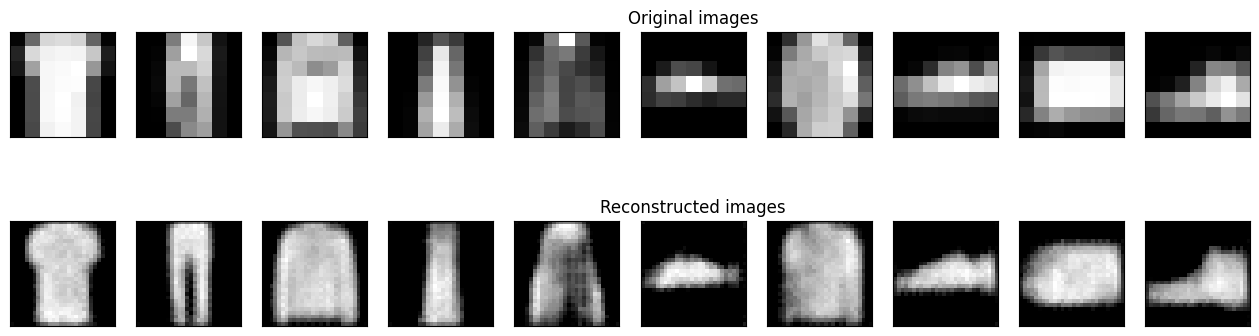

	 partial train loss (single batch): 0.025361
	 partial train loss (single batch): 0.021451
	 partial train loss (single batch): 0.021845
	 partial train loss (single batch): 0.023334
	 partial train loss (single batch): 0.026197
	 partial train loss (single batch): 0.025243
	 partial train loss (single batch): 0.022987
	 partial train loss (single batch): 0.023053
	 partial train loss (single batch): 0.023174
	 partial train loss (single batch): 0.024616
	 partial train loss (single batch): 0.024116
	 partial train loss (single batch): 0.023958
	 partial train loss (single batch): 0.023036
	 partial train loss (single batch): 0.025368
	 partial train loss (single batch): 0.023188
	 partial train loss (single batch): 0.023360
	 partial train loss (single batch): 0.021527
	 partial train loss (single batch): 0.021708
	 partial train loss (single batch): 0.022602
	 partial train loss (single batch): 0.023817
	 partial train loss (single batch): 0.028494
	 partial train loss (single batch

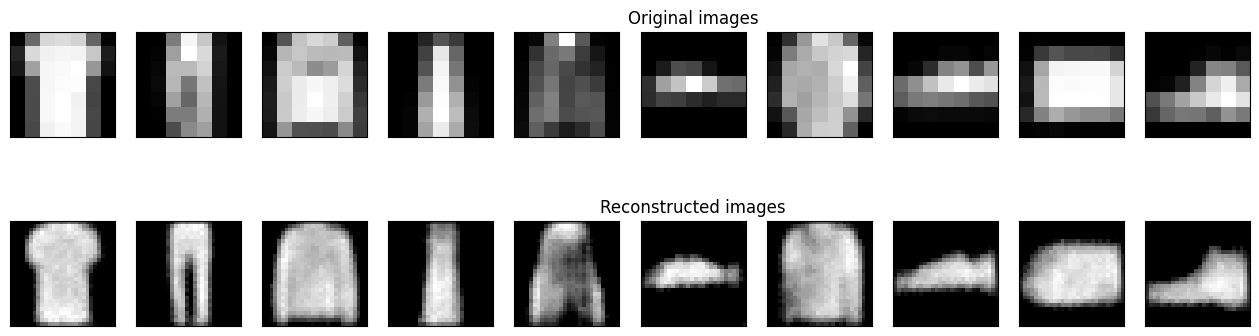

	 partial train loss (single batch): 0.021230
	 partial train loss (single batch): 0.025052
	 partial train loss (single batch): 0.021803
	 partial train loss (single batch): 0.024241
	 partial train loss (single batch): 0.020905
	 partial train loss (single batch): 0.021758
	 partial train loss (single batch): 0.022998
	 partial train loss (single batch): 0.023494
	 partial train loss (single batch): 0.024642
	 partial train loss (single batch): 0.021340
	 partial train loss (single batch): 0.021395
	 partial train loss (single batch): 0.024301
	 partial train loss (single batch): 0.023040
	 partial train loss (single batch): 0.021002
	 partial train loss (single batch): 0.021526
	 partial train loss (single batch): 0.023217
	 partial train loss (single batch): 0.023638
	 partial train loss (single batch): 0.022076
	 partial train loss (single batch): 0.022188
	 partial train loss (single batch): 0.022098
	 partial train loss (single batch): 0.024222
	 partial train loss (single batch

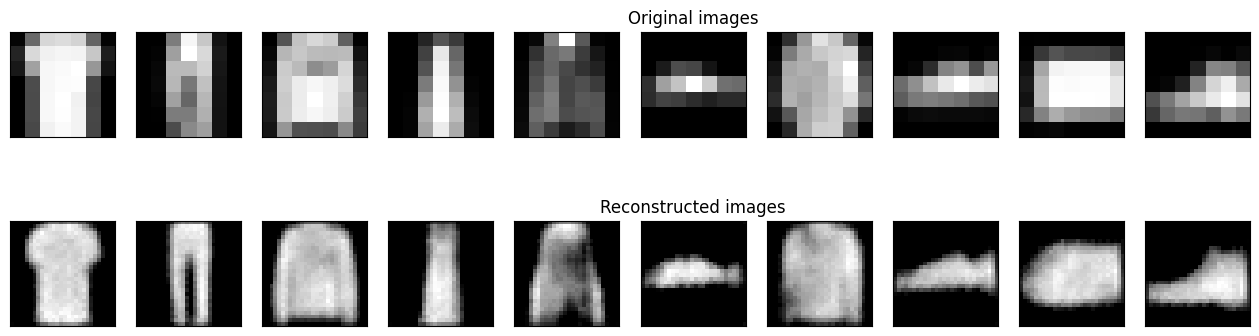

	 partial train loss (single batch): 0.021879
	 partial train loss (single batch): 0.021738
	 partial train loss (single batch): 0.022122
	 partial train loss (single batch): 0.022546
	 partial train loss (single batch): 0.025473
	 partial train loss (single batch): 0.019117
	 partial train loss (single batch): 0.021303
	 partial train loss (single batch): 0.022453
	 partial train loss (single batch): 0.022266
	 partial train loss (single batch): 0.022547
	 partial train loss (single batch): 0.021182
	 partial train loss (single batch): 0.019482
	 partial train loss (single batch): 0.021614
	 partial train loss (single batch): 0.022291
	 partial train loss (single batch): 0.021146
	 partial train loss (single batch): 0.023613
	 partial train loss (single batch): 0.021496
	 partial train loss (single batch): 0.023261
	 partial train loss (single batch): 0.020595
	 partial train loss (single batch): 0.020984
	 partial train loss (single batch): 0.020576
	 partial train loss (single batch

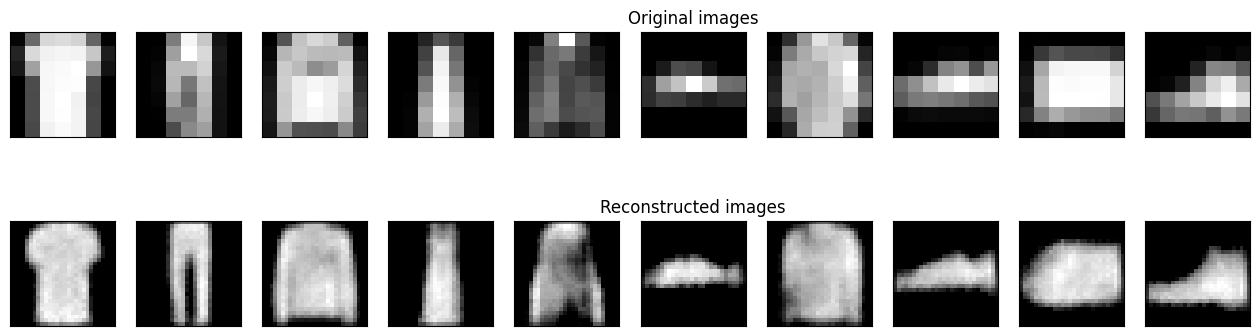

	 partial train loss (single batch): 0.020406
	 partial train loss (single batch): 0.021340
	 partial train loss (single batch): 0.021834
	 partial train loss (single batch): 0.020259
	 partial train loss (single batch): 0.020859
	 partial train loss (single batch): 0.023357
	 partial train loss (single batch): 0.022704
	 partial train loss (single batch): 0.022012
	 partial train loss (single batch): 0.020529
	 partial train loss (single batch): 0.022306
	 partial train loss (single batch): 0.024635
	 partial train loss (single batch): 0.020102
	 partial train loss (single batch): 0.022047
	 partial train loss (single batch): 0.018837
	 partial train loss (single batch): 0.021271
	 partial train loss (single batch): 0.021148
	 partial train loss (single batch): 0.024599
	 partial train loss (single batch): 0.019377
	 partial train loss (single batch): 0.019319
	 partial train loss (single batch): 0.021192
	 partial train loss (single batch): 0.021294
	 partial train loss (single batch

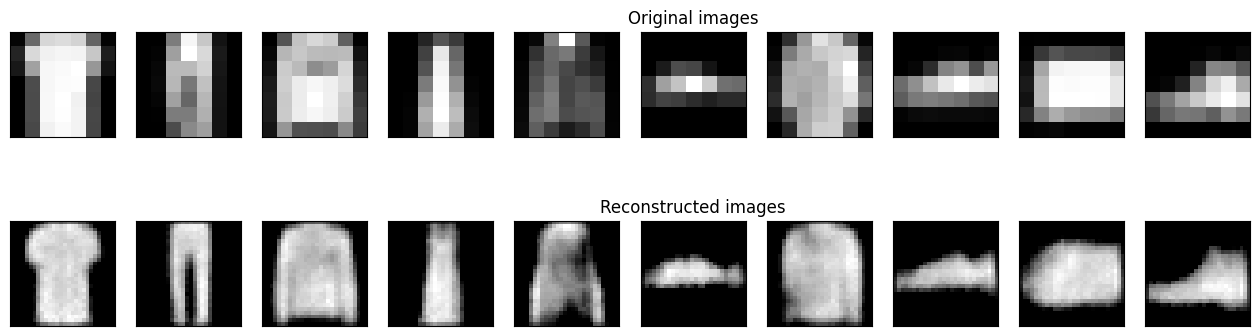

	 partial train loss (single batch): 0.019998
	 partial train loss (single batch): 0.020078
	 partial train loss (single batch): 0.019809
	 partial train loss (single batch): 0.021487
	 partial train loss (single batch): 0.020749
	 partial train loss (single batch): 0.021752
	 partial train loss (single batch): 0.019886
	 partial train loss (single batch): 0.021565
	 partial train loss (single batch): 0.020844
	 partial train loss (single batch): 0.021253
	 partial train loss (single batch): 0.022120
	 partial train loss (single batch): 0.022068
	 partial train loss (single batch): 0.022459
	 partial train loss (single batch): 0.020628
	 partial train loss (single batch): 0.020917
	 partial train loss (single batch): 0.022480
	 partial train loss (single batch): 0.021822
	 partial train loss (single batch): 0.021733
	 partial train loss (single batch): 0.019261
	 partial train loss (single batch): 0.021764
	 partial train loss (single batch): 0.020797
	 partial train loss (single batch

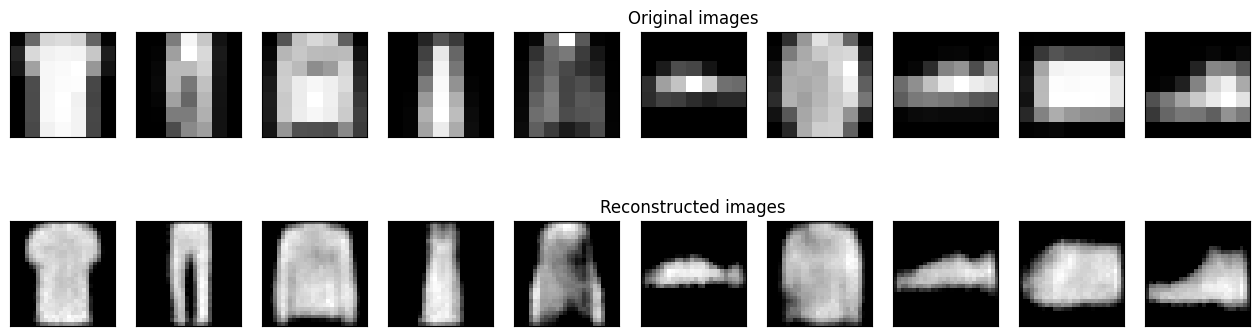

	 partial train loss (single batch): 0.021669
	 partial train loss (single batch): 0.021104
	 partial train loss (single batch): 0.020953
	 partial train loss (single batch): 0.020323
	 partial train loss (single batch): 0.020730
	 partial train loss (single batch): 0.020122
	 partial train loss (single batch): 0.020306
	 partial train loss (single batch): 0.021476
	 partial train loss (single batch): 0.021452
	 partial train loss (single batch): 0.021434
	 partial train loss (single batch): 0.022012
	 partial train loss (single batch): 0.020612
	 partial train loss (single batch): 0.023288
	 partial train loss (single batch): 0.020172
	 partial train loss (single batch): 0.018123
	 partial train loss (single batch): 0.021641
	 partial train loss (single batch): 0.022115
	 partial train loss (single batch): 0.022565
	 partial train loss (single batch): 0.021995
	 partial train loss (single batch): 0.021551
	 partial train loss (single batch): 0.021207
	 partial train loss (single batch

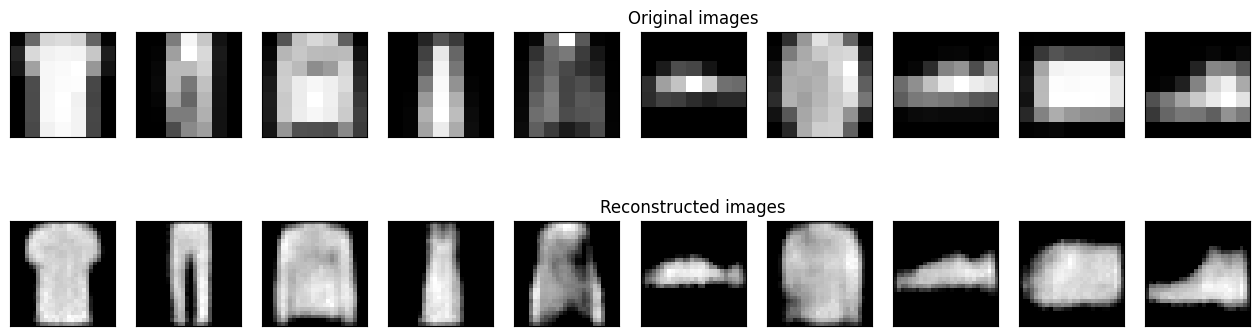

	 partial train loss (single batch): 0.022187
	 partial train loss (single batch): 0.021865
	 partial train loss (single batch): 0.019113
	 partial train loss (single batch): 0.019197
	 partial train loss (single batch): 0.020348
	 partial train loss (single batch): 0.019174
	 partial train loss (single batch): 0.020462
	 partial train loss (single batch): 0.019779
	 partial train loss (single batch): 0.020066
	 partial train loss (single batch): 0.020846
	 partial train loss (single batch): 0.018636
	 partial train loss (single batch): 0.022880
	 partial train loss (single batch): 0.019814
	 partial train loss (single batch): 0.020343
	 partial train loss (single batch): 0.020630
	 partial train loss (single batch): 0.020385
	 partial train loss (single batch): 0.021646
	 partial train loss (single batch): 0.018965
	 partial train loss (single batch): 0.021903
	 partial train loss (single batch): 0.021464
	 partial train loss (single batch): 0.020679
	 partial train loss (single batch

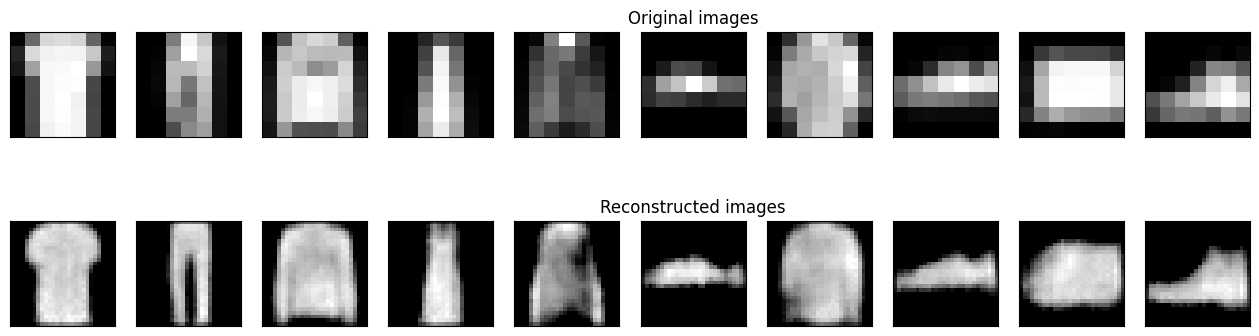

	 partial train loss (single batch): 0.019417
	 partial train loss (single batch): 0.021047
	 partial train loss (single batch): 0.018847
	 partial train loss (single batch): 0.019360
	 partial train loss (single batch): 0.019782
	 partial train loss (single batch): 0.019712
	 partial train loss (single batch): 0.019142
	 partial train loss (single batch): 0.018565
	 partial train loss (single batch): 0.022833
	 partial train loss (single batch): 0.019965
	 partial train loss (single batch): 0.020453
	 partial train loss (single batch): 0.021682
	 partial train loss (single batch): 0.020474
	 partial train loss (single batch): 0.020278
	 partial train loss (single batch): 0.020225
	 partial train loss (single batch): 0.023610
	 partial train loss (single batch): 0.019646
	 partial train loss (single batch): 0.020280
	 partial train loss (single batch): 0.021078
	 partial train loss (single batch): 0.021706
	 partial train loss (single batch): 0.020231
	 partial train loss (single batch

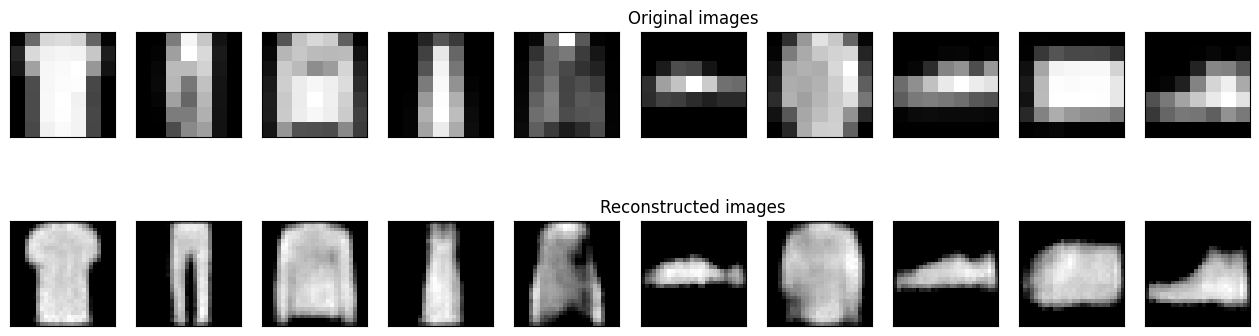

	 partial train loss (single batch): 0.018387
	 partial train loss (single batch): 0.021695
	 partial train loss (single batch): 0.020358
	 partial train loss (single batch): 0.020725
	 partial train loss (single batch): 0.019415
	 partial train loss (single batch): 0.019074
	 partial train loss (single batch): 0.019432
	 partial train loss (single batch): 0.018269
	 partial train loss (single batch): 0.019278
	 partial train loss (single batch): 0.020054
	 partial train loss (single batch): 0.020313
	 partial train loss (single batch): 0.020976
	 partial train loss (single batch): 0.022653
	 partial train loss (single batch): 0.021193
	 partial train loss (single batch): 0.018378
	 partial train loss (single batch): 0.019192
	 partial train loss (single batch): 0.021773
	 partial train loss (single batch): 0.018724
	 partial train loss (single batch): 0.018033
	 partial train loss (single batch): 0.020407
	 partial train loss (single batch): 0.021361
	 partial train loss (single batch

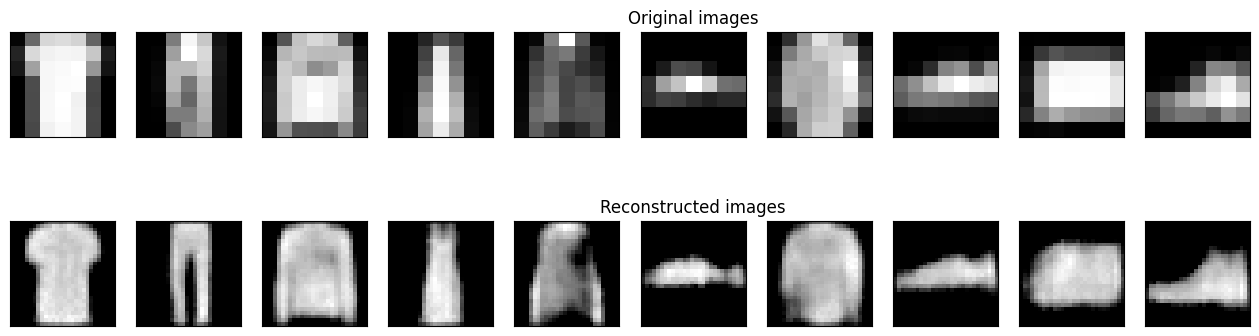

	 partial train loss (single batch): 0.020117
	 partial train loss (single batch): 0.018982
	 partial train loss (single batch): 0.020388
	 partial train loss (single batch): 0.021385
	 partial train loss (single batch): 0.017565
	 partial train loss (single batch): 0.019405
	 partial train loss (single batch): 0.020279
	 partial train loss (single batch): 0.019846
	 partial train loss (single batch): 0.019366
	 partial train loss (single batch): 0.018967
	 partial train loss (single batch): 0.021020
	 partial train loss (single batch): 0.022612
	 partial train loss (single batch): 0.018055
	 partial train loss (single batch): 0.021623
	 partial train loss (single batch): 0.018864
	 partial train loss (single batch): 0.022264
	 partial train loss (single batch): 0.018325
	 partial train loss (single batch): 0.019668
	 partial train loss (single batch): 0.021115
	 partial train loss (single batch): 0.019779
	 partial train loss (single batch): 0.019739
	 partial train loss (single batch

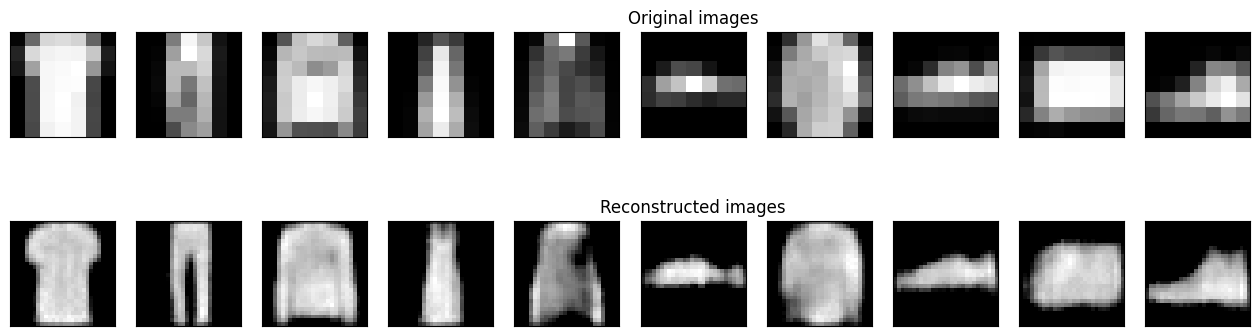

	 partial train loss (single batch): 0.019484
	 partial train loss (single batch): 0.019468
	 partial train loss (single batch): 0.019045
	 partial train loss (single batch): 0.018940
	 partial train loss (single batch): 0.021139
	 partial train loss (single batch): 0.020697
	 partial train loss (single batch): 0.019627
	 partial train loss (single batch): 0.019707
	 partial train loss (single batch): 0.020016
	 partial train loss (single batch): 0.018875
	 partial train loss (single batch): 0.018682
	 partial train loss (single batch): 0.018498
	 partial train loss (single batch): 0.019124
	 partial train loss (single batch): 0.021026
	 partial train loss (single batch): 0.019220
	 partial train loss (single batch): 0.021713
	 partial train loss (single batch): 0.020919
	 partial train loss (single batch): 0.019518
	 partial train loss (single batch): 0.020347
	 partial train loss (single batch): 0.019801
	 partial train loss (single batch): 0.019535
	 partial train loss (single batch

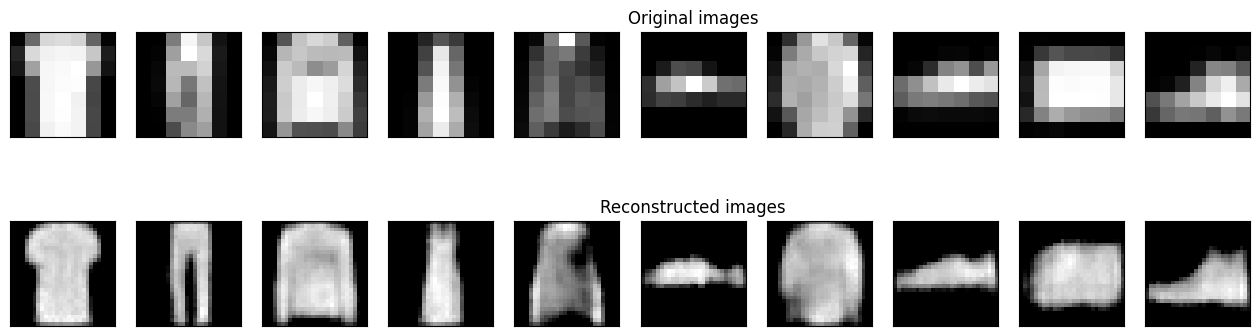

	 partial train loss (single batch): 0.018292
	 partial train loss (single batch): 0.019831
	 partial train loss (single batch): 0.019598
	 partial train loss (single batch): 0.018949
	 partial train loss (single batch): 0.020118
	 partial train loss (single batch): 0.021400
	 partial train loss (single batch): 0.018642
	 partial train loss (single batch): 0.021554
	 partial train loss (single batch): 0.020072
	 partial train loss (single batch): 0.019677
	 partial train loss (single batch): 0.018513
	 partial train loss (single batch): 0.020355
	 partial train loss (single batch): 0.019796
	 partial train loss (single batch): 0.020130
	 partial train loss (single batch): 0.018370
	 partial train loss (single batch): 0.020578
	 partial train loss (single batch): 0.019723
	 partial train loss (single batch): 0.020022
	 partial train loss (single batch): 0.022143
	 partial train loss (single batch): 0.021369
	 partial train loss (single batch): 0.019063
	 partial train loss (single batch

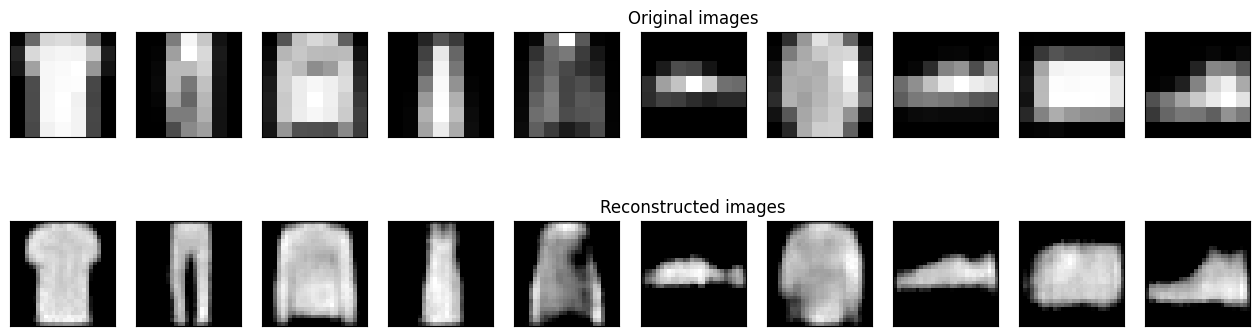

	 partial train loss (single batch): 0.020243
	 partial train loss (single batch): 0.019866
	 partial train loss (single batch): 0.017328
	 partial train loss (single batch): 0.019434
	 partial train loss (single batch): 0.019170
	 partial train loss (single batch): 0.019507
	 partial train loss (single batch): 0.019398
	 partial train loss (single batch): 0.017767
	 partial train loss (single batch): 0.018550
	 partial train loss (single batch): 0.020317
	 partial train loss (single batch): 0.018400
	 partial train loss (single batch): 0.021527
	 partial train loss (single batch): 0.017285
	 partial train loss (single batch): 0.018471
	 partial train loss (single batch): 0.020837
	 partial train loss (single batch): 0.018354
	 partial train loss (single batch): 0.020245
	 partial train loss (single batch): 0.022377
	 partial train loss (single batch): 0.019494
	 partial train loss (single batch): 0.020578
	 partial train loss (single batch): 0.020025
	 partial train loss (single batch

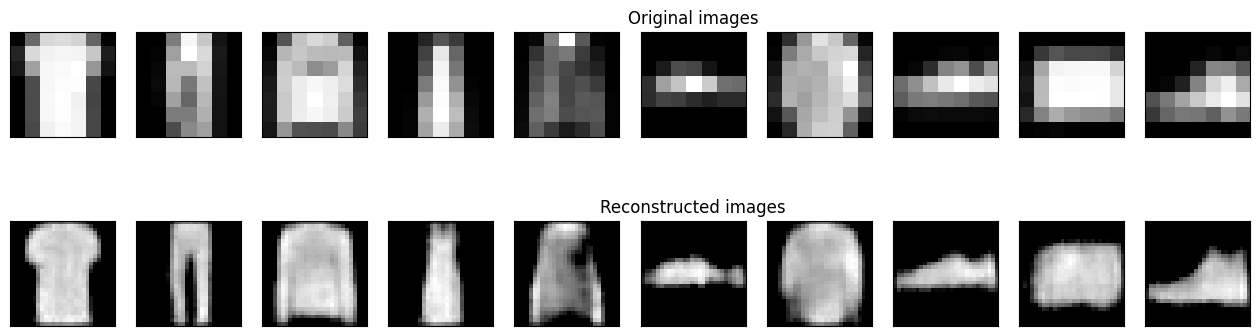

	 partial train loss (single batch): 0.020133
	 partial train loss (single batch): 0.019230
	 partial train loss (single batch): 0.020989
	 partial train loss (single batch): 0.019438
	 partial train loss (single batch): 0.019768
	 partial train loss (single batch): 0.017256
	 partial train loss (single batch): 0.018528
	 partial train loss (single batch): 0.018825
	 partial train loss (single batch): 0.019348
	 partial train loss (single batch): 0.018645
	 partial train loss (single batch): 0.016401
	 partial train loss (single batch): 0.020874
	 partial train loss (single batch): 0.021566
	 partial train loss (single batch): 0.019398
	 partial train loss (single batch): 0.020518
	 partial train loss (single batch): 0.021041
	 partial train loss (single batch): 0.021200
	 partial train loss (single batch): 0.020541
	 partial train loss (single batch): 0.019959
	 partial train loss (single batch): 0.018143
	 partial train loss (single batch): 0.020385
	 partial train loss (single batch

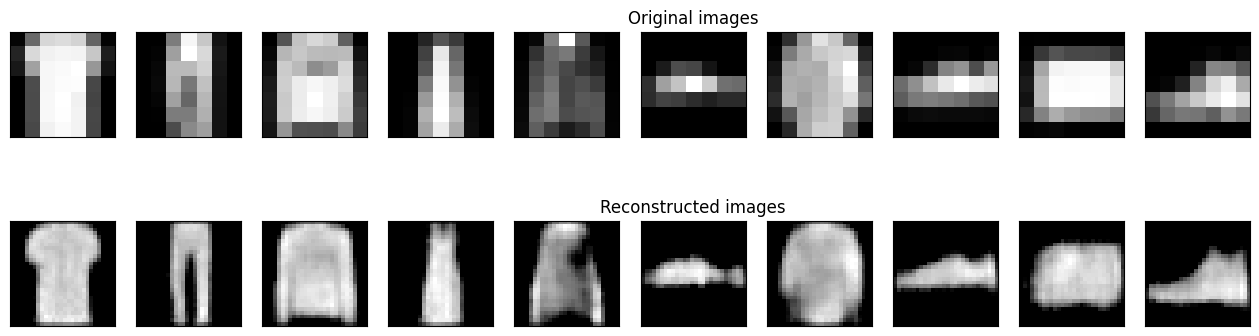

	 partial train loss (single batch): 0.020694
	 partial train loss (single batch): 0.020649
	 partial train loss (single batch): 0.020371
	 partial train loss (single batch): 0.018737
	 partial train loss (single batch): 0.018308
	 partial train loss (single batch): 0.018867
	 partial train loss (single batch): 0.018726
	 partial train loss (single batch): 0.020359
	 partial train loss (single batch): 0.018236
	 partial train loss (single batch): 0.019714
	 partial train loss (single batch): 0.019935
	 partial train loss (single batch): 0.021051
	 partial train loss (single batch): 0.017395
	 partial train loss (single batch): 0.018473
	 partial train loss (single batch): 0.019799
	 partial train loss (single batch): 0.018643
	 partial train loss (single batch): 0.020788
	 partial train loss (single batch): 0.018240
	 partial train loss (single batch): 0.019685
	 partial train loss (single batch): 0.019830
	 partial train loss (single batch): 0.019746
	 partial train loss (single batch

KeyboardInterrupt: ignored

In [778]:
num_epochs = 30
diz_loss = {'train_loss':[],'val_loss':[]}
for epoch in range(num_epochs):
   train_loss =train_epoch(encoder,decoder,device,
   train_loader,loss_fn,optim)
   val_loss = test_epoch(encoder,decoder,device,test_loader,loss_fn)
   print('\n EPOCH {}/{} \t train loss {} \t val loss {}'.format(epoch + 1, num_epochs,train_loss,val_loss))
   diz_loss['train_loss'].append(train_loss)
   diz_loss['val_loss'].append(val_loss)
   plot_ae_outputs(encoder,decoder, test_dataset,n=10)

